In [3]:
import tensorflow as tf
from tensorflow import keras
import pickle
# Overload warn to disable sklearn warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import preprocessing

import matplotlib.pyplot as plt
import numpy as np

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


| Representative Images |
	| Class  0  |


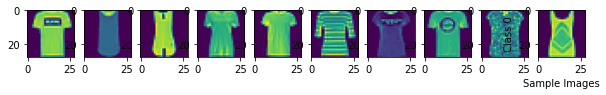

	| Class  1  |


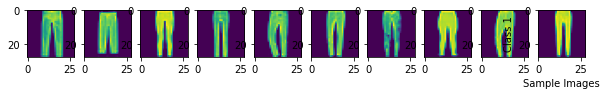

	| Class  2  |


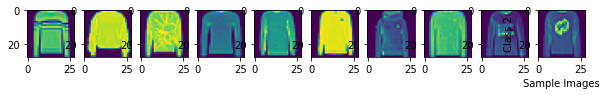

	| Class  3  |


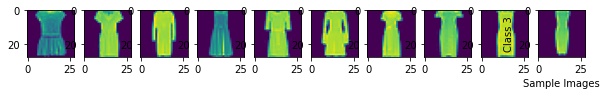

	| Class  4  |


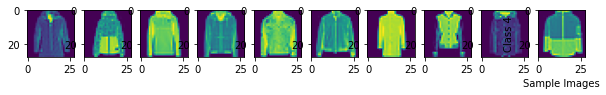

	| Class  5  |


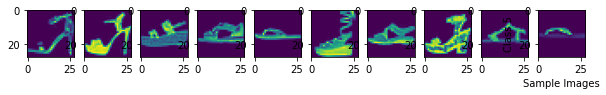

	| Class  6  |


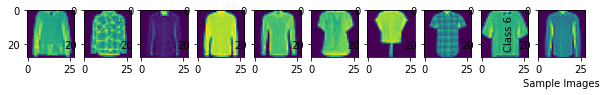

	| Class  7  |


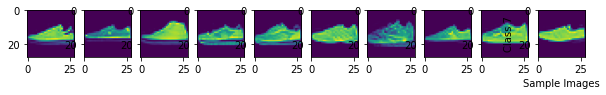

	| Class  8  |


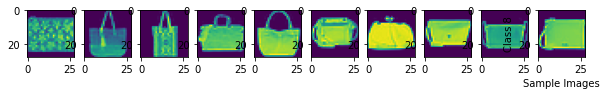

	| Class  9  |


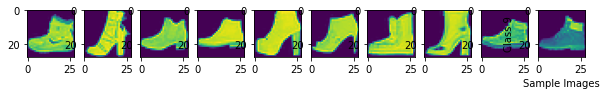

In [4]:
# train_image = np.array(train_images)
# train_label = np.array(train_labels)

print('| Representative Images |')

for label in np.unique(train_labels):
  print('\t| Class ', label, ' |')
  f, axarr = plt.subplots(1,10, figsize=(10,1))
  plt.xlabel("Sample Images")
  plt.ylabel("Class " + str(label))
  index = 0
  for image_index in (train_labels == label).nonzero()[0][0:10]:
    axarr[index].imshow(train_images[image_index])
    index += 1
    # plt.imshow(train_images[image_index])
  plt.show()    

# for i in range(10):
#   print('Class: ', train_label[i])
#   plt.imshow(train_image[i])
#   plt.show()


In [5]:
# Training k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)

nsamples, nx, ny = train_images.shape
reshaped_train_dataset = preprocessing.scale(train_images.reshape((nsamples,nx*ny)))

%time knn.fit(reshaped_train_dataset[0:5000], train_labels[0:5000])

CPU times: user 401 ms, sys: 0 ns, total: 401 ms
Wall time: 407 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
nsamples, nx, ny = test_images.shape
reshaped_test_dataset = preprocessing.scale(test_images.reshape((nsamples,nx*ny)))

In [7]:
# Testing k-NN Classifier
%time predictions = knn.predict(reshaped_test_dataset[0:500])

print('Accuracy: ', np.mean(predictions == test_labels[0:500]))

CPU times: user 4.84 s, sys: 2.18 ms, total: 4.84 s
Wall time: 4.85 s
Accuracy:  0.818


In [37]:
# Training Logistic Regression
print('Training Logistic Regression:')
# ‘newton-cg’, ‘sag’, ‘saga’, ‘lbfgs’ and ‘liblinear’
%time regression_clf = LogisticRegression(dual=False,C=1.0,class_weight='balanced',solver='newton-cg').fit(reshaped_train_dataset[0:5000], train_labels[0:5000])

# Testing Logistic Regression
print('Testing Logistic Regression:')
%time predictions = regression_clf.predict(reshaped_test_dataset[0:500])

print('Accuracy: ', np.mean(predictions == test_labels[0:500]))

Training Logistic Regression:
CPU times: user 2min 27s, sys: 9.69 s, total: 2min 37s
Wall time: 1min 19s
Testing Logistic Regression:
CPU times: user 6.67 ms, sys: 4.04 ms, total: 10.7 ms
Wall time: 5.37 ms
Accuracy:  0.828


-----------------------------------------------

In [38]:
svm_clf = SVC(kernel='rbf')
print('Training SVM(rbf):') #Training SVM rbf
%time svm_clf.fit(reshaped_train_dataset[0:5000], train_labels[0:5000])

print('Predicting with SVM(rbf):') #Testing SVM rbf
# %time predictions = svm_clf.predict(reshaped_test_dataset[0:500])

%time print('Accuracy: ', svm_clf.score(reshaped_test_dataset[0:500], test_labels[0:500]))# np.mean(predictions == test_labels[0:500]))


Training SVM(rbf):
CPU times: user 12.3 s, sys: 4.44 ms, total: 12.3 s
Wall time: 12.3 s
Predicting with SVM(rbf):
Accuracy:  0.872
CPU times: user 1.85 s, sys: 133 µs, total: 1.85 s
Wall time: 1.85 s


In [10]:
svm_clf = SVC(kernel='linear')
print('Training SVM(linear):') #Training SVM Linear
%time svm_clf.fit(reshaped_train_dataset[0:5000], train_labels[0:5000])

print('Predicting with SVM(linear):') #Testing SVM Linear
%time predictions = svm_clf.predict(reshaped_test_dataset[0:500])

print('Accuracy: ', np.mean(predictions == test_labels[0:500]))

Training SVM(linear):
CPU times: user 7.09 s, sys: 4.42 ms, total: 7.09 s
Wall time: 7.11 s
Predicting with SVM(linear):
CPU times: user 1.21 s, sys: 0 ns, total: 1.21 s
Wall time: 1.21 s
Accuracy:  0.82


## **Tuning hyperparameters in knn by changing value of n_neighbors from 2 to 15, changing default algorithm from auto to kd_tree, metric to euclidean and value of p from a default value of 2 to 5**

In [24]:
# Training k-NN classifier by tuning hyperparameters 
knn = KNeighborsClassifier(n_neighbors=15, algorithm= 'kd_tree', metric='euclidean', p=5)

nsamples, nx, ny = train_images.shape
reshaped_train_dataset = preprocessing.scale(train_images.reshape((nsamples,nx*ny)))

%time knn.fit(reshaped_train_dataset[0:5000], train_labels[0:5000])

CPU times: user 417 ms, sys: 9 µs, total: 417 ms
Wall time: 422 ms


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=5,
                     weights='uniform')

In [0]:
nsamples, nx, ny = test_images.shape
reshaped_test_dataset = preprocessing.scale(test_images.reshape((nsamples,nx*ny)))

In [26]:
# Testing k-NN Classifier by tuning hyperparameters
%time predictions = knn.predict(reshaped_test_dataset[0:500])

print('Accuracy: ', np.mean(predictions == test_labels[0:500]))

CPU times: user 4.82 s, sys: 2.23 ms, total: 4.82 s
Wall time: 4.84 s
Accuracy:  0.826


### **Tuning hyperparameters in Logistic Regression by changing values of C from 1.0 to 0.3, solver as sag, multi_class as multinomial and n_jobs to 3**

In [30]:
# Training Logistic Regression by tuning hyperparameters
print('Training Logistic Regression:') 
%time regression_clf = LogisticRegression(dual=False,C=0.3,class_weight='balanced',solver='sag', multi_class='multinomial', n_jobs=3).fit(reshaped_train_dataset[0:5000], train_labels[0:5000])

# Testing Logistic Regression by tuning hyperparameters
print('Testing Logistic Regression:')
%time predictions = regression_clf.predict(reshaped_test_dataset[0:500])

print('Accuracy: ', np.mean(predictions == test_labels[0:500]))

Training Logistic Regression:
CPU times: user 16.9 s, sys: 5.89 ms, total: 16.9 s
Wall time: 17 s
Testing Logistic Regression:
CPU times: user 3.38 ms, sys: 17 µs, total: 3.39 ms
Wall time: 2.14 ms
Accuracy:  0.846


## **Tuning hyperparameters in SVM rbf by changing values of C from 1.0 to 0.3, degree from a default value of 3 to 5, gamma from scale to auto, shrinking from True to False, tol val,ue from 0.001 to 0.05, decision_function_shape from ovr to** **ovo** 

In [31]:
svm_clf = SVC(kernel='rbf', C= 0.2, degree=5, gamma='auto', shrinking=False, tol=0.05, decision_function_shape='ovo')
print('Training SVM(rbf):')
%time svm_clf.fit(reshaped_train_dataset[0:5000], train_labels[0:5000])

print('Predicting with SVM(rbf):')
# %time predictions = svm_clf.predict(reshaped_test_dataset[0:500])

print('Accuracy: ', svm_clf.score(reshaped_test_dataset[0:500], test_labels[0:500]))# np.mean(predictions == test_labels[0:500]))

Training SVM(rbf):
CPU times: user 15.1 s, sys: 2.3 ms, total: 15.1 s
Wall time: 15.2 s
Predicting with SVM(rbf):
Accuracy:  0.812


## **Tuning hyperparameters in SVM linear by changing values of C from 1.0 to 0.01, degree from a default value of 3 to 1, gamma from scale to auto, tol from o.oo1 to o.o2, decision_function_shape from ovr to ovo**

In [34]:
svm_clf = SVC(kernel='linear', C= 0.01, degree=1, gamma='auto', shrinking=True, tol=0.02, decision_function_shape='ovo')
print('Training SVM(linear):') #Training SVM Linear by tuning hyperparameters
%time svm_clf.fit(reshaped_train_dataset[0:5000], train_labels[0:5000])

print('Predicting with SVM(linear):') #Testing SVM Linear by tuning byperparameters
%time predictions = svm_clf.predict(reshaped_test_dataset[0:500])

print('Accuracy: ', np.mean(predictions == test_labels[0:500]))

Training SVM(linear):
CPU times: user 6.61 s, sys: 3.07 ms, total: 6.61 s
Wall time: 6.63 s
Predicting with SVM(linear):
CPU times: user 1.3 s, sys: 66 µs, total: 1.3 s
Wall time: 1.3 s
Accuracy:  0.85


| Algorithm           | Train Running time(in sec) | Test Running Time(in sec) |
|---------------------|--------------------|-------------------|
| k-NN                |         0.407           |         4.85         |
| Logistic Regression |           157    |         0.01          |
| SVM (rbf)           |          12.3         |       1.85          |
| SVM (linear)        |           7.11         |      1.21            |



*(All algorithms trained on 5000 records from training set and tested on 500 records on test set.)*

**# Tradeoffs across methods:**
- **k-NN:**
  - Calculates distances to find neighbours when predicting
  - No training as such, just stores the data (Lazy learner)
  - Slow prediction
  - Performs better in low dimensional space
  - Performs better if classes in data are highly separable
-**Logistic Regression:**
  - Performs algebraic calculation for best fit curve for the complete dataset.
  - In training itself , the curve is fitted to data points classifying the datapoints as per the classes.
  - It is linear regression with some non-linear activation function at the end to covert the regular/continuous output into different classes
  - Performs better with high number of features 
  - Minimizes logistic loss

- **SVM :**
  - Finds a straight line (or hyperplane) with largest minimum    distance to the training samples
  - Performs better in high dimensional space
  - SVM with kernel as rbf performs better dimensional mapping than  linear kernel but takes more time in training
  - Minimizes hinge loss
